In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import plotly.graph_objects as go
plt.style.use('ggplot')

In [2]:
# method 1 : use beauty module

from beauty import Beauty
beauty = Beauty('http://pc-tbed-bst-03:8080')
#beauty = Beauty('https://vm-atlas-tdaq-cc.cern.ch/tbed/pbeast/api/')  //P1 online data

In [3]:
run_num = 479269

In [4]:
csv_path = '/eos/home-i03/m/mdtoffline/mdt_dcs_offline/run_files/'

run_num_list = pd.read_csv(csv_path + 'run_numbs_start_end.csv')  # load existing csv

In [5]:
ts_start_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_start'].values[0]
ts_end_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_end'].values[0]

fmt = '%Y-%m-%d %H:%M:%S'

since_dt = dt.strptime(ts_start_dt, fmt) - timedelta(minutes=10)
till_dt = dt.strptime(ts_end_dt, fmt) + timedelta(minutes=10)
print(since_dt)
print(till_dt)

2024-06-30 04:22:00
2024-06-30 19:27:42


In [6]:
# since = dt(2024, 4, 18, 18, 20, 0) # Scan for a stable beam run
# till = dt(2024, 4, 19, 8, 20, 0)
# since

In [7]:
lbn = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSDDC:daqLumiBlockNumber.value',None, False)[0]
lbn

2024-06-30 04:12:31.503000+02:00      34.0
2024-06-30 04:22:57.788001+02:00      34.0
2024-06-30 04:30:57.905000+02:00       0.0
2024-06-30 04:32:00.107000+02:00       1.0
2024-06-30 04:33:00.218000+02:00       2.0
                                     ...  
2024-06-30 19:14:12.597000+02:00    1082.0
2024-06-30 19:15:12.600000+02:00    1083.0
2024-06-30 19:16:12.710000+02:00    1084.0
2024-06-30 19:17:12.717000+02:00    1085.0
2024-06-30 19:22:52.997000+02:00    1085.0
Name: ATLGCSDDC:daqLumiBlockNumber.value, Length: 1089, dtype: float64

In [8]:
# test stable beam flag
sbFlag = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSLHC:bit_lhc_RunCtrl_SafeBeam_StableBeams.value',None, False)[0]
sb_start_dt = sbFlag.index[0].replace(tzinfo=None)
sb_end_dt = sbFlag.index[1].replace(tzinfo=None)
sbFlag

2024-06-30 04:28:25.043000+02:00    1.0
2024-06-30 19:12:10.371000+02:00    0.0
Name: ATLGCSLHC:bit_lhc_RunCtrl_SafeBeam_StableBeams.value, dtype: float64

In [9]:
# test stable beam flag
beam_type_Flag = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSLHC:DetectorBIS.BeamStateFlags',None, False)[0]

beam_type_Flag

2024-06-30 04:28:25.972000+02:00    1.0
2024-06-30 19:12:10.957000+02:00    0.0
Name: ATLGCSLHC:DetectorBIS.BeamStateFlags, dtype: float64

In [10]:
sb_range = str(sb_start_dt)[:-3] + ' - ' + str(sb_end_dt)[:-3]
sb_range

'2024-06-30 04:28:25.043 - 2024-06-30 19:12:10.371'

In [11]:
r4pFlag = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSLHC:ATLAS.Ready4Physics',None, False)[0]
r4p_start_dt = r4pFlag.index[0].replace(tzinfo=None)
r4p_end_dt = r4pFlag.index[1].replace(tzinfo=None)
r4pFlag

2024-06-30 04:56:08.697000+02:00    1.0
2024-06-30 19:11:24.610000+02:00    0.0
Name: ATLGCSLHC:ATLAS.Ready4Physics, dtype: float64

In [12]:
rlinfo_arr = []

for lbi, lb in zip(lbn.index, lbn.values):

    lbi = lbi.replace(tzinfo=None)
    sb = 0
    r4p = 0
    
    if sb_start_dt < lbi < sb_end_dt:
        sb = 1
    if r4p_start_dt < lbi < r4p_end_dt:
        r4p = 1
    rlinfo = ({ 'LumiBlock': int(lb),'AtlasPhysics': r4p, 'StableBeams': sb, 'ts': lbi})
    rlinfo_arr.append(rlinfo)

rlinfo_df = pd.DataFrame(rlinfo_arr)
rlinfo_df

LumiBlock  AtlasPhysics  StableBeams                         ts
0            34             0            0 2024-06-30 04:12:31.503000
1            34             0            0 2024-06-30 04:22:57.788001
2             0             0            1 2024-06-30 04:30:57.905000
3             1             0            1 2024-06-30 04:32:00.107000
4             2             0            1 2024-06-30 04:33:00.218000
...         ...           ...          ...                        ...
1084       1082             0            0 2024-06-30 19:14:12.597000
1085       1083             0            0 2024-06-30 19:15:12.600000
1086       1084             0            0 2024-06-30 19:16:12.710000
1087       1085             0            0 2024-06-30 19:17:12.717000
1088       1085             0            0 2024-06-30 19:22:52.997000

[1089 rows x 4 columns]

In [13]:
# since_dt = sbFlag.index[0].to_pydatetime().replace(tzinfo=None)  # Set start and end times for stable beam run
# till_dt = sbFlag.index[1].to_pydatetime().replace(tzinfo=None)
# since_dt

In [14]:
hltmon = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSMDT', 'value-number', 'ATLMDTPS2:CAEN/PSMDT02/branchController00/easyCrate0/easyBoard01/channel001.actual.iMon', None, False)[0]
lumi = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi.value', None, False)[0]
mu = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_Mu.value', None, False)[0]

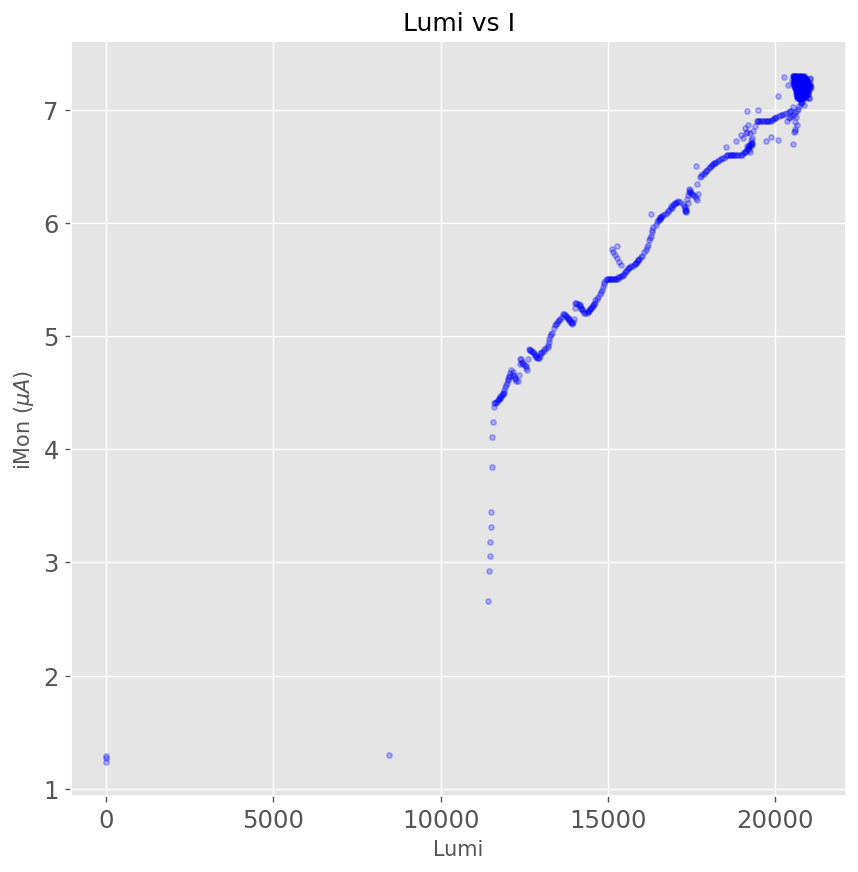

In [15]:
hv_lumi = hltmon.correlate(lumi)
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(8,8), dpi=125)

hv_lumi.plot(marker='.',linestyle='None',color='blue',alpha = .25)
plt.xlabel('Lumi')
plt.ylabel(r'iMon ($\mu A$)')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Lumi vs I')
plt.show()

In [16]:
# method 2 : use libpbeasepy module

import libpbeastpy

db = libpbeastpy.ServerProxy('http://pc-tbed-bst-03:8080')

In [17]:
import re
import pandas as pd

#function to create the dataframe from queryData

def queryDataToDataFrame(queryData):
    
    # Define a regular expression pattern to match the timestamp and value
    pattern = r"DataPoint\(ts=(\d+), value=('.*?'|[0-9.]+)\)"

    row =[]
    
    for key in queryData[0].data.keys():
        for x in queryData[0].data[key]:
            #print(x)
            # Use re.match to find the values
            match = re.match(pattern, str(x))
            if match:
                timestamp = match.group(1)
                value = match.group(2)
                #print(f"Timestamp: {timestamp}, Value: {value}")
            else:
                print("The string does not match the expected format.")
                return
            row.append((key,timestamp,value))
    # Define column names
    column_names = ['datapoint','ts', 'value']

    # Create the DataFrame using the list of tuples
    df = pd.DataFrame(row, columns=column_names)
    return df

In [18]:
run_num = 479374

In [19]:
ts_start_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_start'].values[0]
ts_end_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_end'].values[0]

fmt = '%Y-%m-%d %H:%M:%S'

# ts_start_dt = "2024-08-31 02:09:25"
# ts_end_dt = "2024-08-31 18:21:09"

since_dt = dt.strptime(ts_start_dt, fmt)
till_dt = dt.strptime(ts_end_dt, fmt)
print(since_dt)
print(till_dt)
print(till_dt-since_dt)

2024-07-01 22:42:22
2024-07-02 15:31:10
16:48:48


In [20]:
since_ts = int(since_dt.timestamp()*1e6)
till_ts = int(till_dt.timestamp()*1e6)

In [21]:
def timestamp_to_pdSeries(df):
    t = pd.Series([],dtype='object')
    for i in df['ts'].astype('float64').values:
        _ = pd.Series([dt.fromtimestamp(i/1e6)])
        t = pd.concat([t,_])
    return t

In [22]:
def time_plot(tsys, since_dt, till_dt, title, ylabel, ybound = False, ybound_scale=.1):

    times = pd.date_range(since_dt, till_dt, periods=7)
    max_ys = []
    min_ys = []
    
    fig, ax = plt.subplots(1,figsize=(9,5),dpi=125)
    fig.autofmt_xdate()
    xfmt = dates.DateFormatter(fmt[:8] + '\n' + fmt[9:])
    ax.xaxis.set_major_formatter(xfmt)
    for t, y, l in tsys:
        max_ys.append(max(y))
        min_ys.append(min(y))
        ax.plot_date(t, y, '.-', mec='b', ms=2, label = l)
    if ybound == True:
        max_y = max(max_ys)
        min_y = min(min_ys)
        ax.set(ylim=(min_y*(1-ybound_scale), max_y*(1+ybound_scale)))
    plt.legend()
    plt.xticks(times)
    plt.title(title)
    plt.xlabel('t')
    plt.ylabel(ylabel)
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
    ax.xaxis.grid(True, which="minor")
    plt.tight_layout()

In [23]:
%%time
mdt_hvImon_queryData = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', 'ATLMDTPS2:CAEN/PSMDT02/branchController00/easyCrate0/easyBoard01/channel001.actual.iMon', True, since_ts, till_ts, 0, True)

CPU times: user 3.93 ms, sys: 3.52 ms, total: 7.44 ms
Wall time: 154 ms


In [24]:
md_hvImon_df = queryDataToDataFrame(mdt_hvImon_queryData)

In [25]:
md_hvImon_df.sort_values(by=['ts'], inplace=True)

In [26]:
t = pd.to_datetime(md_hvImon_df['ts'], unit = 'us')
y = md_hvImon_df['value'].astype('float64')

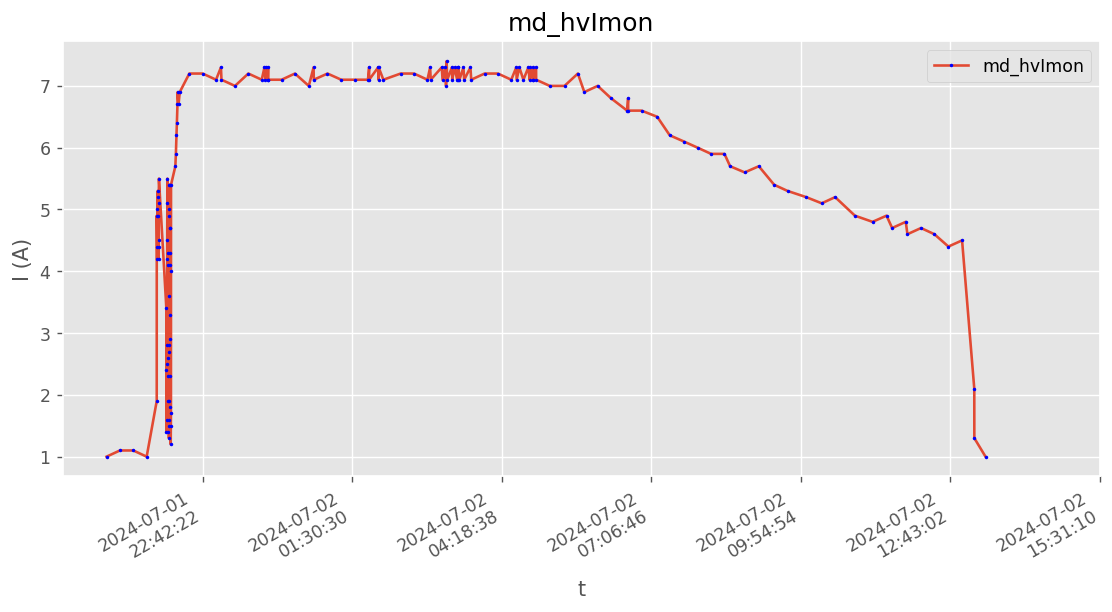

In [27]:
time_plot([(t, y, 'md_hvImon')], since_dt, till_dt, 'md_hvImon', 'I (A)')
plt.show()

In [28]:
%%time
mdt_hvVmon_queryData = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', 'ATLMDTPS2:CAEN/PSMDT02/branchController00/easyCrate0/easyBoard01/channel001.actual.vMon', True, since_ts, till_ts, 0, True)

CPU times: user 1.6 ms, sys: 2.54 ms, total: 4.14 ms
Wall time: 151 ms


In [29]:
md_hvVmon_df = queryDataToDataFrame(mdt_hvVmon_queryData)

In [30]:
md_hvVmon_df.sort_values(by=['ts'], inplace=True)

In [31]:
t = pd.to_datetime(md_hvVmon_df['ts'], unit = 'us')
y = md_hvVmon_df['value'].astype('float64')

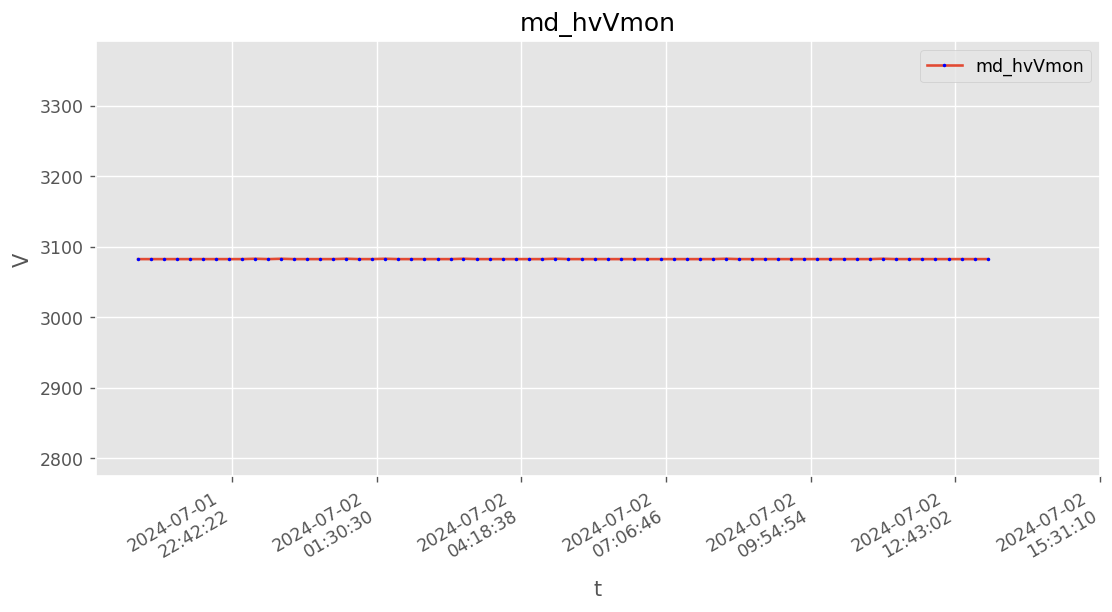

In [32]:
time_plot([(t, y, 'md_hvVmon')], since_dt, till_dt, 'md_hvVmon', 'V', True)
plt.show()

In [33]:
ts_start_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_start'].values[0]
ts_end_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_end'].values[0]

ts_start_dt = '2024-07-01 09:13:57'
ts_end_dt = '2024-08-02 00:10:13'

fmt = '%Y-%m-%d %H:%M:%S'

since_dt = dt.strptime(ts_start_dt, fmt)
till_dt = dt.strptime(ts_end_dt, fmt)
print(since_dt)
print(till_dt)
print(till_dt-since_dt)
since_ts = int(since_dt.timestamp()*1e6)
till_ts = int(till_dt.timestamp()*1e6)

ts_start_dt_series = pd.to_datetime(run_num_list['ts_start'], format = fmt)
ts_end_dt_series = pd.to_datetime(run_num_list['ts_end'], format = fmt)


runs_in_timerange = run_num_list[(since_dt <= ts_start_dt_series ) & (till_dt >= ts_end_dt_series)]['run_number'].values
print(runs_in_timerange.shape[0])
runs_in_timerange

2024-07-01 09:13:57
2024-08-02 00:10:13
31 days, 14:56:16
12


array([479345, 479374, 479398, 479404, 479439, 479449, 479483, 479496,
       479507, 479519, 479553, 479563])

In [34]:
pd.set_option('display.max_colwidth', None)

mdt_unplugged_queryData = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*unplugged', True, since_ts, till_ts, 0, True)
mdt_unplugged_df = queryDataToDataFrame(mdt_unplugged_queryData)
mdt_unplugged_df = mdt_unplugged_df[mdt_unplugged_df['value'] != '0.0']
print(mdt_unplugged_df)

                                                                                          datapoint  \
95517  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel000.actual.unplugged   
95632  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel001.actual.unplugged   
95747  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel002.actual.unplugged   
95814  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel003.actual.unplugged   
95816  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel004.actual.unplugged   
95866  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel005.actual.unplugged   
95981  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel006.actual.unplugged   
96096  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/channel007.actual.unplugged   
96163  ATLMDTPS3:CAEN/PSMDT01/branchController15/easyCrate5/easyBoard13/c

In [35]:
%%time
# mdt_BIS7A_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BI.*A.*.Vcc', True, since_ts, till_ts, 0, True)
mdt_BIS7A12_VCC_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BIS7A12.*.Vcc', True, since_ts, till_ts, 0, True)
md_hvVmon_df.sort_values(by=['ts'], inplace=True)

CPU times: user 6.13 ms, sys: 9.23 ms, total: 15.4 ms
Wall time: 480 ms


In [36]:
# mdt_BIS7A12_VCC = queryDataToDataFrame(mdt_BIS7A12_VCC_df)

In [37]:
# mdt_BIS7A12_VCC.sort_values(by=['ts'], inplace=True)

In [38]:
# mdt_BIS7A12_VCC.head(3)

In [39]:
# t = pd.to_datetime(mdt_BIS7A12_VCC['ts'], unit = 'us')
# y = mdt_BIS7A12_VCC['value'].astype('float64')

In [40]:
# time_plot([(t, y, 'mdt_BIS7A12_VCC')], since_dt, till_dt, 'mdt_BIS7A12_VCC', 'V', True)
# plt.show()

In [41]:
%%time
# mdt_BIS7A_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BI.*A.*.Vcc', True, since_ts, till_ts, 0, True)
mdt_BIL3A01_ntc01_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BIL3A01.*.ntc.ntc01.*', True, since_ts, till_ts, 0, True)
mdt_BIL3A01_ntc02_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BIL3A01.*.ntc.ntc02.*', True, since_ts, till_ts, 0, True)
mdt_BIL3A01_ntc03_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BIL3A01.*.ntc.ntc03.*', True, since_ts, till_ts, 0, True)
mdt_BIL3A01_ntc04_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BIL3A01.*.ntc.ntc04.*', True, since_ts, till_ts, 0, True)
mdt_BIL3A01_ntc05_df = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-number', '.*BIL3A01.*.ntc.ntc05.*', True, since_ts, till_ts, 0, True)

CPU times: user 22.3 ms, sys: 30.2 ms, total: 52.4 ms
Wall time: 2.46 s


In [42]:
mdt_BIL3A01_ntc01 = queryDataToDataFrame(mdt_BIL3A01_ntc01_df)
mdt_BIL3A01_ntc02 = queryDataToDataFrame(mdt_BIL3A01_ntc02_df)
mdt_BIL3A01_ntc03 = queryDataToDataFrame(mdt_BIL3A01_ntc03_df)
mdt_BIL3A01_ntc04 = queryDataToDataFrame(mdt_BIL3A01_ntc04_df)
mdt_BIL3A01_ntc05 = queryDataToDataFrame(mdt_BIL3A01_ntc05_df)

In [43]:
mdt_BIL3A01_ntc01.sort_values(by=['ts'], inplace=True)
mdt_BIL3A01_ntc02.sort_values(by=['ts'], inplace=True)
mdt_BIL3A01_ntc03.sort_values(by=['ts'], inplace=True)
mdt_BIL3A01_ntc04.sort_values(by=['ts'], inplace=True)
mdt_BIL3A01_ntc05.sort_values(by=['ts'], inplace=True)

In [44]:
mdt_BIL3A01_ntc01.head(3)

datapoint                ts   value
0  ATLMDTMDM1:BIL3A01.ntc.ntc01.value  1719822027560000  23.832
1  ATLMDTMDM1:BIL3A01.ntc.ntc01.value  1719829271088000  23.853
2  ATLMDTMDM1:BIL3A01.ntc.ntc01.value  1719836514875000  23.828

In [45]:
t1 = pd.to_datetime(mdt_BIL3A01_ntc01['ts'], unit = 'us')
y1 = mdt_BIL3A01_ntc01['value'].astype('float64')
l1 = 'ntc01'
t2 = pd.to_datetime(mdt_BIL3A01_ntc02['ts'], unit = 'us')
y2 = mdt_BIL3A01_ntc02['value'].astype('float64')
l2 = 'ntc02'
t3 = pd.to_datetime(mdt_BIL3A01_ntc03['ts'], unit = 'us')
y3 = mdt_BIL3A01_ntc03['value'].astype('float64')
l3 = 'ntc03'
t4 = pd.to_datetime(mdt_BIL3A01_ntc04['ts'], unit = 'us')
y4 = mdt_BIL3A01_ntc04['value'].astype('float64')
l4 = 'ntc04'
t5 = pd.to_datetime(mdt_BIL3A01_ntc05['ts'], unit = 'us')
y5 = mdt_BIL3A01_ntc05['value'].astype('float64')
l5 = 'ntc05'

tsys = [(t1, y1, l1), (t2, y2, l2), (t3, y3, l3), (t4, y4, l4), (t5, y5, l5)]

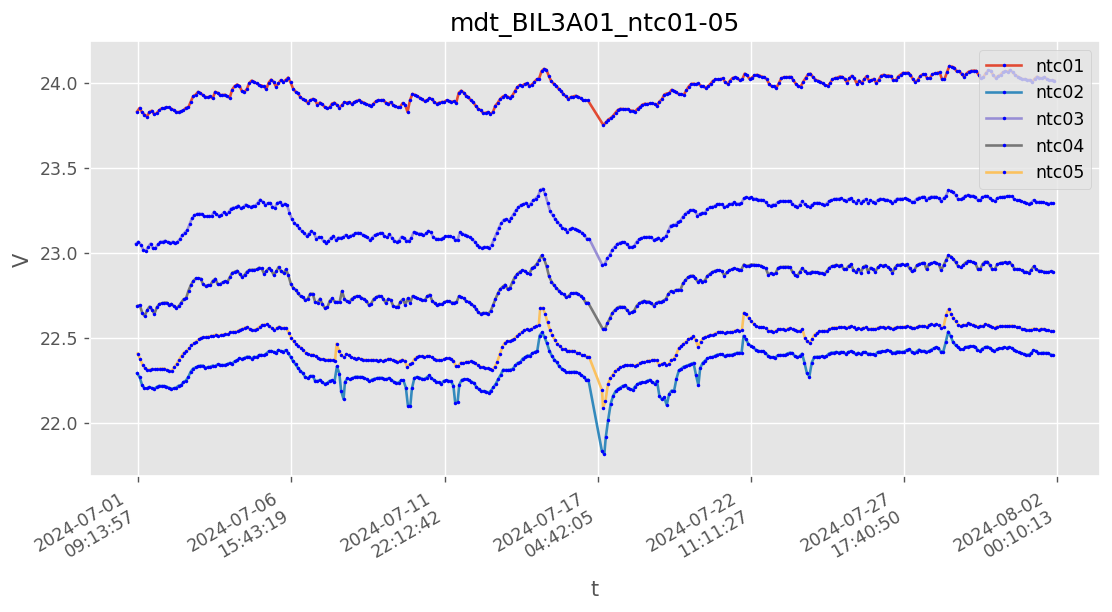

In [46]:
time_plot(tsys, since_dt, till_dt, 'mdt_BIL3A01_ntc01-05', 'V', True, .006)
plt.show()

In [63]:
# run_num = 479374

# ts_start_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_start'].values[0]
# ts_end_dt = run_num_list[run_num_list['run_number'] == run_num]['ts_end'].values[0]

ts_start_dt = '2024-08-05 13:26:02'
ts_end_dt = '2024-08-10 13:26:02'

fmt = '%Y-%m-%d %H:%M:%S'

since_dt = dt.strptime(ts_start_dt, fmt)
till_dt = dt.strptime(ts_end_dt, fmt)
print(since_dt)
print(till_dt)
print(till_dt-since_dt)
since_ts = int(since_dt.timestamp()*1e6)
till_ts = int(till_dt.timestamp()*1e6)

2024-08-05 13:26:02
2024-08-10 13:26:02
5 days, 0:00:00


In [64]:
mdt_all_fsm_status_queryData = db.get_data('DCS', 'ATLAS_PVSSMDT', 'value-string', '.*fsm.currentState', True, since_ts, till_ts, 0, True)
mdt_all_fsm_status_df = queryDataToDataFrame(mdt_all_fsm_status_queryData)
mdt_all_fsm_status_df.sort_values(by=['ts'], inplace=True)
print('All FSM values:\n\n', mdt_all_fsm_status_df['value'].unique())

All FSM values:

 ["'RAMP_UP'" "'RAMPING'" "'ON'" "'READY'" "'REQUEST'" "'PRELOAD'"
 "'RESET'" "'STRINGLOAD'" "'VERIFY'" "'INITIALIZED'" "'RAMP_DOWN'"
 "'STANDBY'" "'NOT_INITIALIZED'" "'OFF'" "'NOT_READY'" "'UNPLUGGED'"
 "'FAILED'"]


In [65]:
mdt_fsm_status_queryData = db.get_data('DCS', 
                                       'ATLAS_PVSSMDT', 
                                       'value-string', 
                                       '.*MDM.*fsm.currentState', 
                                       True, 
                                       since_ts, 
                                       till_ts, 
                                       0, 
                                       True)

mdt_fsm_status_df = queryDataToDataFrame(mdt_fsm_status_queryData)
mdt_fsm_flags_df  = mdt_fsm_status_df[(mdt_fsm_status_df['value'] != "'OFF'") & 
                                      (mdt_fsm_status_df['value'] != "'ON'") & 
                                      (mdt_fsm_status_df['value'] != "'STANDBY'") & 
                                      (mdt_fsm_status_df['value'] != "'INITIALIZED'") & 
                                      (mdt_fsm_status_df['value'] != "'RAMP_UP'") & 
                                      (mdt_fsm_status_df['value'] != "'RAMPING'") & 
                                      (mdt_fsm_status_df['value'] != "'RAMP_DOWN'") & 
                                      (mdt_fsm_status_df['value'] != "'REQUEST'") & 
                                      (mdt_fsm_status_df['value'] != "'PRELOAD'") & 
                                      (mdt_fsm_status_df['value'] != "'VERIFY'") & 
                                      (mdt_fsm_status_df['value'] != "'RESET'") & 
                                      (mdt_fsm_status_df['value'] != "'STRINGLOAD'") & 
                                      (mdt_fsm_status_df['value'] != "'READY'")
]

mdt_fsm_flags_df.sort_values(by=['ts'], inplace=True)
mdt_fsm_flags_df['ts'] = pd.to_datetime(mdt_fsm_flags_df['ts'], unit = 'us')

/tmp/ipykernel_714/2409296864.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdt_fsm_flags_df.sort_values(by=['ts'], inplace=True)
/tmp/ipykernel_714/2409296864.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdt_fsm_flags_df['ts'] = pd.to_datetime(mdt_fsm_flags_df['ts'], unit = 'us')


In [66]:
mdt_fsm_flags_df

datapoint  \
1784   ATLMDTMDM1:MDT_BC_JTAG_INNER|BIR4C11.fsm.currentState   
1838   ATLMDTMDM1:MDT_BC_JTAG_INNER|BIR5C11.fsm.currentState   
1840   ATLMDTMDM1:MDT_BC_JTAG_INNER|BIR5C11.fsm.currentState   
1786   ATLMDTMDM1:MDT_BC_JTAG_INNER|BIR4C11.fsm.currentState   
2096   ATLMDTMDM1:MDT_BC_JTAG_INNER|BIS3C08.fsm.currentState   
...                                                      ...   
2975  ATLMDTMDM2:MDT_BA_JTAG_MIDDLE|BML6A07.fsm.currentState   
3537  ATLMDTMDM2:MDT_BC_JTAG_MIDDLE|BML1C15.fsm.currentState   
3735  ATLMDTMDM2:MDT_BC_JTAG_MIDDLE|BML4C15.fsm.currentState   
3737  ATLMDTMDM2:MDT_BC_JTAG_MIDDLE|BML4C15.fsm.currentState   
3539  ATLMDTMDM2:MDT_BC_JTAG_MIDDLE|BML1C15.fsm.currentState   

                          ts              value  
1784 2024-08-06 07:03:17.348  'NOT_INITIALIZED'  
1838 2024-08-06 07:03:17.348  'NOT_INITIALIZED'  
1840 2024-08-06 07:03:24.276  'NOT_INITIALIZED'  
1786 2024-08-06 07:03:24.277  'NOT_INITIALIZED'  
2096 2024-08-06 14:26:00.681  'NOT_INITIALIZED'  
...                      ...                ...  
2975 2024-08-06 16:08:08.957           'FAILED'  
3537 2024-08-06 16:24:01.340  'NOT_INITIALIZED'  
3735 2024-08-06 16:24:01.340  'NOT_INITIALIZED'  
3737 2024-08-06 16:24:08.764  'NOT_INITIALIZED'  
3539 2024-08-06 16:24:08.766  'NOT_INITIALIZED'  

[335 rows x 3 columns]

In [67]:
def generate_lbn_sb_r4p_df(since_dt, till_dt):
    
    lbn_df = beauty.timeseries(since_dt, 
                            till_dt, 
                            'DCS', 
                            'ATLAS_PVSSDCS', 
                            'value-number', 
                            'ATLGCSDDC:daqLumiBlockNumber.value', 
                            None, 
                            False)[0]
    sb_df = beauty.timeseries(since_dt, 
                               till_dt, 
                               'DCS', 
                               'ATLAS_PVSSDCS', 
                               'value-number', 
                               'ATLGCSLHC:bit_lhc_RunCtrl_SafeBeam_StableBeams.value', 
                               None, 
                               False)[0]
    r4p_df = beauty.timeseries(since_dt, 
                                till_dt, 
                                'DCS', 
                                'ATLAS_PVSSDCS', 
                                'value-number', 
                                'ATLGCSLHC:ATLAS.Ready4Physics', 
                                None, 
                                False)[0]
    
    lbn_df = pd.DataFrame({'value': lbn_df.array, 'dt': lbn_df.index.tz_localize(None) + timedelta(hours = 2)})
    sb_df = pd.DataFrame({'value': sb_df.array , 'dt': sb_df.index.tz_localize(None) + timedelta(hours = 2)})
    r4p_df = pd.DataFrame({'value': r4p_df.array , 'dt': r4p_df.index.tz_localize(None) + timedelta(hours = 2)})
    
    lbns = []
    lbn_tss = []
    sbs = []
    sb_tss = []
    r4ps = []
    r4p_tss= []
    
    sb = sb_df.iloc[0]['value']
    r4p = r4p_df.iloc[0]['value']
    
    lbn_prev = lbn_df.iloc[0]['value']
    
    i = 0
    j = 0
    k = 0

    lbn_ts = int(dt.timestamp(lbn_df.iloc[i]['dt'])*int(1e6))
    lbn_ts_prev = lbn_ts
    sb_ts = int(dt.timestamp(sb_df.iloc[i]['dt'])*int(1e6))
    sb_ts_prev = lbn_ts
    r4p_ts = int(dt.timestamp(r4p_df.iloc[i]['dt'])*int(1e6))
    r4p_ts_prev = lbn_ts
    
    if sb_ts > lbn_ts:
    
        if sb == 1.0:
    
            sb = 0.0
    
        else:
    
            sb = 1.0
    
    if r4p_ts > lbn_ts:
    
        if r4p == 1.0:
    
            r4p = 0.0
    
        else:
    
            r4p = 1.0
    
    for i in range(lbn_df.shape[0]-1):
    
        lbn_ts = int(dt.timestamp(lbn_df.iloc[i]['dt'])*int(1e6))
        
        if lbn_ts > sb_ts:

            # if sb_ts == int(dt.timestamp(sb_df.iloc[j]['dt'])*int(1e6))
    
            sb = sb_df.iloc[j]['value']
    
            if j < sb_df.shape[0] - 1:
                
                print('Yea!')
                sb_ts_prev = int(dt.timestamp(sb_df.iloc[j]['dt'])*int(1e6))
                j += 1
                sb_ts = int(dt.timestamp(sb_df.iloc[j]['dt'])*int(1e6))

            else:

                sb_ts_prev = int(dt.timestamp(sb_df.iloc[-1]['dt'])*int(1e6))

    
        if lbn_ts > r4p_ts:
    
            r4p = r4p_df.iloc[k]['value']
    
            if k < r4p_df.shape[0] - 1:
                
                r4p_ts_prev = int(dt.timestamp(r4p_df.iloc[k]['dt'])*int(1e6))
                k += 1
                r4p_ts = int(dt.timestamp(r4p_df.iloc[k]['dt'])*int(1e6))

            else:

                r4p_ts_prev = int(dt.timestamp(r4p_df.iloc[-1]['dt'])*int(1e6))

                
    
        lbns.append(lbn_df.iloc[i-1]['value'])
        sbs.append(sb)
        r4ps.append(r4p)
        lbn_tss.append(lbn_ts_prev)
        sb_tss.append(sb_ts_prev)
        r4p_tss.append(r4p_ts_prev)
        
        lbn_ts_prev = lbn_ts
    
    dic_tmp = {'LumiBlock Number': lbns, 
               'StableBeam': sbs, 
               'Ready4Physics': r4ps, 
               'LumiBlock ts': lbn_tss, 
               'StableBeam ts': sb_tss, 
               'Ready4Physics ts': r4p_tss}
    
    lbn_sb_r4p_df = pd.DataFrame(dic_tmp)
    lbn_sb_r4p_df['LumiBlock dt'] = pd.to_datetime(lbn_sb_r4p_df['LumiBlock ts'], unit = 'us')
    #lbn_sb_r4p_df.drop(columns = ['Ready4Physics ts'], inplace = True)
    
    while lbn_sb_r4p_df['LumiBlock Number'].iloc[0] != 1.0:

        lbn_sb_r4p_df = lbn_sb_r4p_df.iloc[1:]

    return lbn_sb_r4p_df, sb_df

In [52]:
lbn_sb_r4p_df, sb_df = generate_lbn_sb_r4p_df(dt.fromtimestamp(since_ts/1e6), 
                                       dt.fromtimestamp(till_ts/1e6))

Yea!


In [53]:
lbn_sb_r4p_df['StableBeam dt'] = pd.to_datetime(lbn_sb_r4p_df['StableBeam ts'], unit = 'us')
lbn_sb_r4p_df['Ready4Physics dt'] = pd.to_datetime(lbn_sb_r4p_df['Ready4Physics ts'], unit = 'us')

In [54]:
sb_df.iloc[0][0]

1.0

In [55]:
test = pd.DataFrame(lbn_sb_r4p_df['StableBeam dt'].rename('Value'))
test

Value
1    2024-07-01 22:42:22.040
2    2024-07-01 22:42:22.040
3    2024-07-01 22:42:22.040
4    2024-07-01 22:42:22.040
5    2024-07-01 22:42:22.040
...                      ...
1221 2024-07-02 15:10:31.353
1222 2024-07-02 15:10:31.353
1223 2024-07-02 15:10:31.353
1224 2024-07-02 15:10:31.353
1225 2024-07-02 15:10:31.353

[1225 rows x 1 columns]

In [56]:
lbn_sb_r4p_df['LumiBlock Number'].max()

1225.0

In [57]:
lbn_sb_r4p_df

LumiBlock Number  StableBeam  Ready4Physics      LumiBlock ts  \
1                  1.0         0.0            0.0  1719873742040000   
2                  2.0         0.0            0.0  1719873766879000   
3                  3.0         0.0            0.0  1719873790414000   
4                  4.0         0.0            0.0  1719873800628000   
5                  5.0         0.0            0.0  1719873853311000   
...                ...         ...            ...               ...   
1221            1221.0         0.0            0.0  1719933970222000   
1222            1222.0         0.0            0.0  1719934016401000   
1223            1223.0         0.0            0.0  1719934076606000   
1224            1224.0         0.0            0.0  1719934136712000   
1225            1225.0         0.0            0.0  1719934196721000   

         StableBeam ts  Ready4Physics ts            LumiBlock dt  \
1     1719873742040000  1719873742040000 2024-07-01 22:42:22.040   
2     1719873742040000  1719873742040000 2024-07-01 22:42:46.879   
3     1719873742040000  1719873742040000 2024-07-01 22:43:10.414   
4     1719873742040000  1719873742040000 2024-07-01 22:43:20.628   
5     1719873742040000  1719873742040000 2024-07-01 22:44:13.311   
...                ...               ...                     ...   
1221  1719933031353000  1719932988635000 2024-07-02 15:26:10.222   
1222  1719933031353000  1719932988635000 2024-07-02 15:26:56.401   
1223  1719933031353000  1719932988635000 2024-07-02 15:27:56.606   
1224  1719933031353000  1719932988635000 2024-07-02 15:28:56.712   
1225  1719933031353000  1719932988635000 2024-07-02 15:29:56.721   

               StableBeam dt        Ready4Physics dt  
1    2024-07-01 22:42:22.040 2024-07-01 22:42:22.040  
2    2024-07-01 22:42:22.040 2024-07-01 22:42:22.040  
3    2024-07-01 22:42:22.040 2024-07-01 22:42:22.040  
4    2024-07-01 22:42:22.040 2024-07-01 22:42:22.040  
5    2024-07-01 22:42:22.040 2024-07-01 22:42:22.040  
...                      ...                     ...  
1221 2024-07-02 15:10:31.353 2024-07-02 15:09:48.635  
1222 2024-07-02 15:10:31.353 2024-07-02 15:09:48.635  
1223 2024-07-02 15:10:31.353 2024-07-02 15:09:48.635  
1224 2024-07-02 15:10:31.353 2024-07-02 15:09:48.635  
1225 2024-07-02 15:10:31.353 2024-07-02 15:09:48.635  

[1225 rows x 9 columns]

In [58]:
sb_lb_range = str(int(lbn_sb_r4p_df[lbn_sb_r4p_df['StableBeam'] == 1.0]['LumiBlock Number'].min())) + ' - ' + str(int(lbn_sb_r4p_df[lbn_sb_r4p_df['StableBeam'] == 1.0]['LumiBlock Number'].max()))

In [59]:
sb_lb_range

'100 - 1201'

In [60]:
sb_start_dt = lbn_sb_r4p_df[lbn_sb_r4p_df['StableBeam'] == 1.0]['StableBeam dt'].min()
sb_start_dt

Timestamp('2024-07-01 23:54:04.012000')

In [61]:
sb_end_ = lbn_sb_r4p_df[lbn_sb_r4p_df['StableBeam'] == 1.0]['StableBeam dt'].max()
sb_end_index

NameError: name 'sb_end_index' is not defined

In [ ]:
rn_df = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSDDC:daqRunNumber.value',None, False)[0]
rn_df = pd.DataFrame({'value': rn_df.array , 'dt': rn_df.index.tz_localize(None) + timedelta(hours = 2)})
rn_df['value'] = rn_df['value'].astype(float).astype(int)
rn_df['ts'] = rn_df.dt.values.astype(int) // 10**3
rn_df

In [ ]:
s_e = []

for k in range(rn_df.shape[0] - 1):

    if rn_df.iloc[k]['value'] == rn_df.iloc[k+1]['value']:

        s_e.append('Start')

    else:

        s_e.append('End')

if s_e[-1] == 'Start':

    s_e.append('End')

else:

    s_e.append('Start')

rn_df['Start/End'] = pd.Series(s_e)

rn_df

In [ ]:
rn_df.head(20)
# 2024-08-06 23:30:25.732
# 2024-08-06 05:02:36.681

In [ ]:
lbns = []
fsms = []
fsm_flags = []
fsm_tss = []
lbn_tss = []
sbs = []
r4ps = []
rns = []

i = 0
k = 0

fsm_ts = dt.timestamp(mdt_fsm_flags_df.iloc[i]['ts'])*int(1e6)

for j in range(lbn_sb_r4p_df.shape[0]):

    lbn_ts = lbn_sb_r4p_df.iloc[j]['LumiBlock ts']
    
    if lbn_ts > fsm_ts:

        while k >= 0:

            rn_ts = rn_df.iloc[k]['ts']

            if lbn_ts > rn_ts:

                k += 1

            else:

                rn_se = rn_df.iloc[k]['Start/End']

                if rn_se == 'Start':

                    rns.append(rn_df.iloc[k]['value'])
                
                else:

                    rns.append('Not in Run')
                
                break
                
        lbns.append(lbn_sb_r4p_df.iloc[j]['LumiBlock Number'])
        fsms.append(mdt_fsm_flags_df.iloc[i]['datapoint'][6:-17])
        fsm_flags.append(mdt_fsm_flags_df.iloc[i]['value'])
        sbs.append(lbn_sb_r4p_df.iloc[j]['StableBeam'])
        r4ps.append(lbn_sb_r4p_df.iloc[j]['Ready4Physics'])
        fsm_tss.append(fsm_ts)
        lbn_tss.append(lbn_sb_r4p_df.iloc[j-1]['LumiBlock ts'])

        i += 1
        
        if i == mdt_fsm_flags_df.shape[0]:
            
            break
        
        fsm_ts = dt.timestamp(mdt_fsm_flags_df.iloc[i]['ts'])*int(1e6)

    j += 1

            
dic_tmp = {'LumiBlock Number': lbns, 
           'FSM Datapoint': fsms, 
           'FSM Flag': fsm_flags, 
           'Stable Beam': sbs, 
           'Ready 4 Physics': r4ps, 
           'Run Number': rns,
           'LumiBlock ts': lbn_tss, 
           'FSM ts': fsm_tss}

lbn_fsm_flags_df = pd.DataFrame(dic_tmp)
lbn_fsm_flags_df['LumiBlock dt'] = pd.to_datetime(lbn_fsm_flags_df['LumiBlock ts'], unit = 'us')
lbn_fsm_flags_df['FSM dt'] = pd.to_datetime(lbn_fsm_flags_df['FSM ts'], unit = 'us')
lbn_fsm_flags_df.drop(columns = ['LumiBlock ts', 'FSM ts'], inplace = True)
lbn_fsm_flags_df

In [ ]:
lbn_fsm_flags_df = lbn_fsm_flags_df[(lbn_fsm_flags_df['Stable Beam'] == 1.0) & (lbn_fsm_flags_df.apply(lambda row: ~row.astype(str).str.contains('MDTPS').any(), axis=1))]

In [ ]:
lbn_fsm_flags_df

In [ ]:
lbn_fsm_flags_df[lbn_fsm_flags_df['FSM Datapoint'] != 'Not in Run']

In [ ]:
pd.set_option("styler.format.thousands", '')
pd.set_option("styler.format.precision", 0)
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 20)

In [ ]:
#lbn_fsm_flags_df.style.format("{:,f}", subset = ['Stable Beam']).format('%Y-%m-%d %H:%M:%S', subset = ["LumiBlock dt"])

In [ ]:
def query_data(query, source = 'MDT', type = 'string'):
    queryData = db.get_data('DCS', f'ATLAS_PVSS{source}', f'value-{type}', f'.*{query}.*', True, since_ts, till_ts, 0, True)
    df = queryDataToDataFrame(queryData)
    df.sort_values(by=['ts'], inplace=True)
    df['ts'] = pd.to_datetime(df['ts'], unit = 'us')
    
    return df

In [ ]:
LVO_df = query_data('v0', type = 'number')

In [ ]:
LVO_df[LVO_df['value'] != '0.0'].head(50)

In [ ]:
oldest = dt(2023,1,1,0,0)
now = dt.now()
print(oldest,'\n',now, sep='')

In [ ]:
rn_df = beauty.timeseries(oldest, now, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSDDC:daqRunNumber.value',None, False)[0]
rn_df = pd.DataFrame({'value': rn_df.array , 'dt': rn_df.index.tz_localize(None) + timedelta(hours = 2)})
rn_df['value'] = rn_df['value'].astype(float).astype(int)
rn_df['ts'] = rn_df.dt.values.astype(int) // 10**3
rn_df

In [ ]:
csv_path = '/eos/home-i03/m/mdtoffline/mdt_dcs_offline/streamlit/mdt-dcs-viewer/'

chamber_names = pd.read_csv(csv_path + '/chamb_partition_list.csv')

In [ ]:
number_of_chambers = chamber_names.shape[0]

In [ ]:
sb_lbn_start = int(lbn_sb_r4p_df[lbn_sb_r4p_df['StableBeam'] == 1.0]['LumiBlock Number'].min())
sb_lbn_end = int(lbn_sb_r4p_df[lbn_sb_r4p_df['StableBeam'] == 1.0]['LumiBlock Number'].max())
sb_lbn_total = sb_lbn_end - sb_lbn_start

In [ ]:
mdt_fsm_flags_df

In [ ]:
mdt_fsm_flags_df['datapoint'].tolist()

In [ ]:
datapoints = [x[-24:-17]for x in mdt_fsm_flags_df['datapoint'].tolist()]
datapoints

In [ ]:
lbn_fsm_flags_df = lbn_fsm_flags_df[(lbn_fsm_flags_df['Stable Beam'] == 1.0) & (lbn_fsm_flags_df.apply(lambda row: ~row.astype(str).str.contains('MDTPS').any(), axis=1))]




In [ ]:
percentage_of_flagged_chambers = len(mdt_fsm_flags_df['datapoint'].unique())/number_of_chambers*100

In [ ]:
percentage_of_flagged_chambers

In [ ]:
fsm_pie_chart = go.Figure(go.Sunburst(
    labels=[f"Fully Functional Chambers ({round(100-percentage_of_flagged_chambers,2)}%)", f"Flagged Chambers ({round(percentage_of_flagged_chambers, 2)}%)"],
    parents=["", ""],
    values=[100-percentage_of_flagged_chambers, percentage_of_flagged_chambers],
    insidetextorientation = 'horizontal'
))

fsm_pie_chart.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fsm_pie_chart.show()

In [ ]:
number_of_chambers = len(chamber_names)
percentage_of_flagged_chambers = len(mdt_fsm_flags_df['datapoint'].unique())/number_of_chambers*100

fsm_pie_chart = go.Figure(go.Sunburst(
    labels=[f"Fully Functional Chambers ({round(100-percentage_of_flagged_chambers,2)}%)", f"Flagged Chambers ({round(percentage_of_flagged_chambers, 2)}%)"],
    parents=["", ""],
    values=[100-percentage_of_flagged_chambers, percentage_of_flagged_chambers],
    insidetextorientation = 'horizontal'
))

fsm_pie_chart.update_layout(margin = dict(t=0, l=0, r=0, b=0), uniformtext=dict(minsize=15, mode='hide'))

fsm_pie_chart.show()

In [ ]:
mdt_fsm_status_queryData = db.get_data('DCS', 
                                       'ATLAS_PVSSMDT', 
                                       'value-string', 
                                       '.*fsm.currentState', 
                                       True, 
                                       since_ts, 
                                       till_ts, 
                                       0, 
                                       True)

mdt_fsm_status_df = queryDataToDataFrame(mdt_fsm_status_queryData)

mdt_fsm_status_df.sort_values(by=['ts'], inplace=True)
# mdt_fsm_status_df['ts'] = pd.to_datetime(mdt_fsm_flags_df['ts'], unit = 'us')
mdt_fsm_status_df = mdt_fsm_status_df['datapoint'].unique()

In [ ]:
for i in mdt_fsm_status_df:

    print(i)

In [ ]:
part_chamb = []

for i in mdt_fsm_status_df:

    if 'ATLMDTPS' in i:

        part_chamb.append(i[16:-21])

    elif 'ATLMDTMDM' in i:

        part_chamb.append(i[15:-17])

    else:

        print('wtf')



In [ ]:
for i in part_chamb:
    
        print(i)

In [ ]:
partitions = []
chambers = []

for i in part_chamb:

    chambers.append(i[-7:])

In [ ]:
print(len(chambers))

In [ ]:
chambers = pd.Series(chambers).unique()

In [ ]:
print(chambers.shape[0])

In [ ]:
part = []
chamb = []

for i in part_chamb:

    for j in chambers:

        if j in i:

            if j not in chamb:

                part.append(i[:2])
                chamb.append(j)

df = pd.DataFrame(part, chamb)

        

In [ ]:
df

In [ ]:
def generate_rn_sb_df(since_dt, till_dt):
    
    rn_df = beauty.timeseries(since_dt, till_dt, 'DCS', 'ATLAS_PVSSDCS', 'value-number', 'ATLGCSDDC:daqRunNumber.value',None, False)[0]
    rn_df = pd.DataFrame({'value': rn_df.array , 'dt': rn_df.index.tz_localize(None) + timedelta(hours = 2)})
    rn_df['value'] = rn_df['value'].astype(float).astype(int)
    rn_df['ts'] = rn_df.dt.values.astype(int) // 10**3
    
    for i in rn_df['value'].unique():
        
        if rn_df[rn_df['value'] == i].shape[0] != 2:
    
            rn_df.drop(rn_df[rn_df['value'] == i].index[0], inplace = True)
    
    total_runs = int(rn_df.shape[0]/2)
    
    sb_df = beauty.timeseries(since_dt, 
                               till_dt, 
                               'DCS', 
                               'ATLAS_PVSSDCS', 
                               'value-number', 
                               'ATLGCSLHC:bit_lhc_RunCtrl_SafeBeam_StableBeams.value', 
                               None, 
                               False)[0]
    
    sb_df = pd.DataFrame({'value': sb_df.array , 'dt': sb_df.index.tz_localize(None) + timedelta(hours = 2)})
    
    rns = []
    rn_start_tss = []
    rn_end_tss = []
    sbs = []
    
    j = 0
    
    counter = 0
    
    for i in rn_df['value'].unique()[1:]:
    
        run_se_df = rn_df[rn_df['value'] == i]
    
        rn_start_ts = int(dt.timestamp(run_se_df.iloc[0]['dt'])*int(1e6))
        rn_end_ts = int(dt.timestamp(run_se_df.iloc[1]['dt'])*int(1e6))
        
        sb = sb_df.iloc[j]['value']
        sb_ts = int(dt.timestamp(sb_df.iloc[j]['dt'])*int(1e6))
        
        while sb != 1.0 or sb_ts < rn_start_ts:
    
            j += 1
            
            sb = sb_df.iloc[j]['value']
            sb_ts = int(dt.timestamp(sb_df.iloc[j]['dt'])*int(1e6))
        
        if rn_start_ts < sb_ts < rn_end_ts:
    
            rns.append(i)
            rn_start_tss.append(rn_start_ts)
            rn_end_tss.append(rn_end_ts)
    
            j += 1
    
        else:
            
            counter += 1
    
    dic_tmp = {'Stable Beam Run Number': rns, 
               'Run Start ts': rn_start_tss, 
               'Run End ts': rn_end_tss
              }
    
    percentage_of_stable_beam_runs = round(counter / total_runs * 100, 2)
    print(f"\nPercentage of stable beam runs: {percentage_of_stable_beam_runs}%\n")
    
    rn_sb_df = pd.DataFrame(dic_tmp)
    rn_sb_df['Run Start dt'] = pd.to_datetime(rn_sb_df['Run Start ts'], unit = 'us')
    rn_sb_df['Run End dt'] = pd.to_datetime(rn_sb_df['Run End ts'], unit = 'us')
    rn_sb_df.drop(columns = ['Run Start ts', 'Run End ts'], inplace = True)

    return rn_sb_df

In [ ]:
rn_sb_df = generate_rn_sb_df(dt(2023,1,1,0,0), dt.now()).iloc[::-1].reset_index(drop=True)

In [ ]:
run_info_df = rn_sb_df[rn_sb_df['Stable Beam Run Number'] == run_num]
    
total_run_time = till_dt - since_dt
run_info_df['Total Run Time'] = str(total_run_time)
run_info_df['Run Start dt'] = str(run_info_df['Run Start dt'].iloc[0])[:-4]
run_info_df['Run End dt'] = str(run_info_df['Run End dt'].iloc[0])[:-4]
run_info_df = run_info_df.T.rename(columns={run_info_df.T.columns[0]: "Value"})
run_info_df

In [ ]:
run_info_df

In [ ]:
def query_data(query, source = 'MDT', type = 'string'):
    queryData = db.get_data('DCS', f'ATLAS_PVSS{source}', f'value-{type}', f'.*{query}.*', True, since_ts, till_ts, 0, True)
    df = queryDataToDataFrame(queryData)
    df.sort_values(by=['ts'], inplace=True)
    df['ts'] = pd.to_datetime(df['ts'], unit = 'us')
    
    return df

In [ ]:
query_data('ATLGCSLHC:lhc_RunControl_SafeBeam.value', source = 'DCS', type= 'number')